# Heatmap

Heatmaps são um jeito de visualizar 3 dimensões de dados e aproveitar a proximidade espacial dessas dimensões.

Heatsmaps são poderosos quando temos os dados certos. Dados de clima por exemplo: temos duas dimensões, latitude e longitude,e podemos sobrepor uma terceira,digamos a temperatura.

Mas há onde os heatmaps falham, que é quando não há relação contínua entre as dimensões. Isso induz o espectador a procurar padrões e ordenarpor meio da proximidade espacial.

No matplotlib, heatmaps são simplesmente histogramas 2d onde os valores de x e y indicam pontos potenciais e a cor observada é a frequência.


In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

In [3]:
# Vamos ver alguns exemplos de dados de trânsito de Nova York
df=pd.read_csv("../assets/NYC hourly traffic.csv")

# Vamos converter a coluna 'Date' para datetime
df['Date']=df['Date'].apply(pd.to_datetime)
df

,Plaza ID,Date,Hour,Direction,# Vehicles - E-ZPass,# Vehicles - VToll
0,21,2022-08-06,0,I,2820,649
1,21,2022-08-06,1,I,2124,474
2,21,2022-08-06,2,I,1617,391
3,21,2022-08-06,3,I,1228,358
4,21,2022-08-06,4,I,1604,368
...,...,...,...,...,...,...
1936271,11,2010-01-01,19,I,2675,1152
1936272,11,2010-01-01,20,I,2580,1086
1936273,11,2010-01-01,21,I,2302,987
1936274,11,2010-01-01,22,I,2170,910


In [19]:
# Vamos dizer que estamos interassados em um único Plaza(camera location) e numa certa parte do tempo
df[(df['Plaza ID']==5) & (df['Date']>'2016-12-30')  & (df['Date']<'2017-05-01') ]

,Plaza ID,Date,Hour,Direction,# Vehicles - E-ZPass,# Vehicles - VToll
735652,5,2017-04-29,0,I,216,25
735653,5,2017-04-29,0,O,100,23
735654,5,2017-04-29,1,I,111,21
735655,5,2017-04-29,1,O,53,18
735656,5,2017-04-29,2,I,72,16
...,...,...,...,...,...,...
773399,5,2016-12-31,21,O,234,54
773400,5,2016-12-31,22,I,180,46
773401,5,2016-12-31,22,O,177,40
773402,5,2016-12-31,23,I,126,30


Agora, vamos ver quantos carros passam em determinada hora do dia.

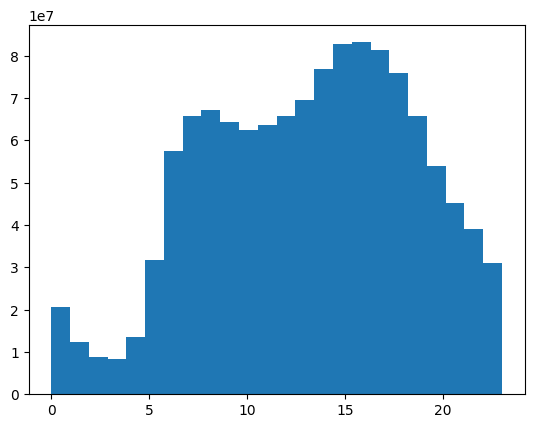

In [26]:
# Como temos 24 horas, faremos bins=24
plt.hist(sample['Hour'],bins=24,weights=sample['# Vehicles - E-ZPass']);

Mas também temos dias da semana que estão ordenados. Vamos extrair o dia da semana e olhar o histograma.

In [42]:
# Podemos extrair o dia da semana da coluna Date usando atributos do Pandas.
# O objeto Series tem um atributo "dt" que armazena transformações.

sample['Day of Week']= sample["Date"].dt.dayofweek

C:\Users\T-Gamer\AppData\Local\Temp\ipykernel_13344\691009919.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['Day of Week']= sample["Date"].dt.dayofweek


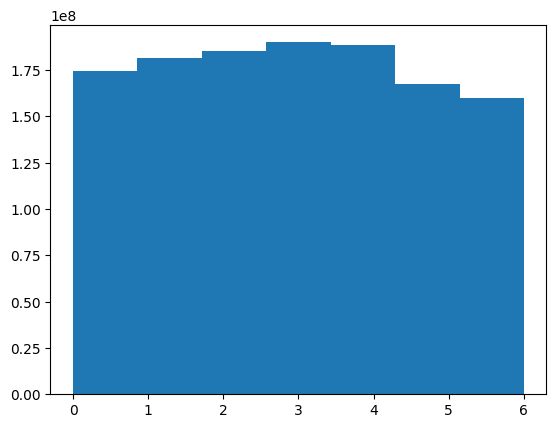

In [45]:
plt.hist(sample["Day of Week"],bins=7,weights=sample["# Vehicles - E-ZPass"]);

Agora temos o tráfego durante os dias da semana.

Podemos olhar esses dois histogramas juntos utilizando o heatmap

In [51]:
plt.hist2d?

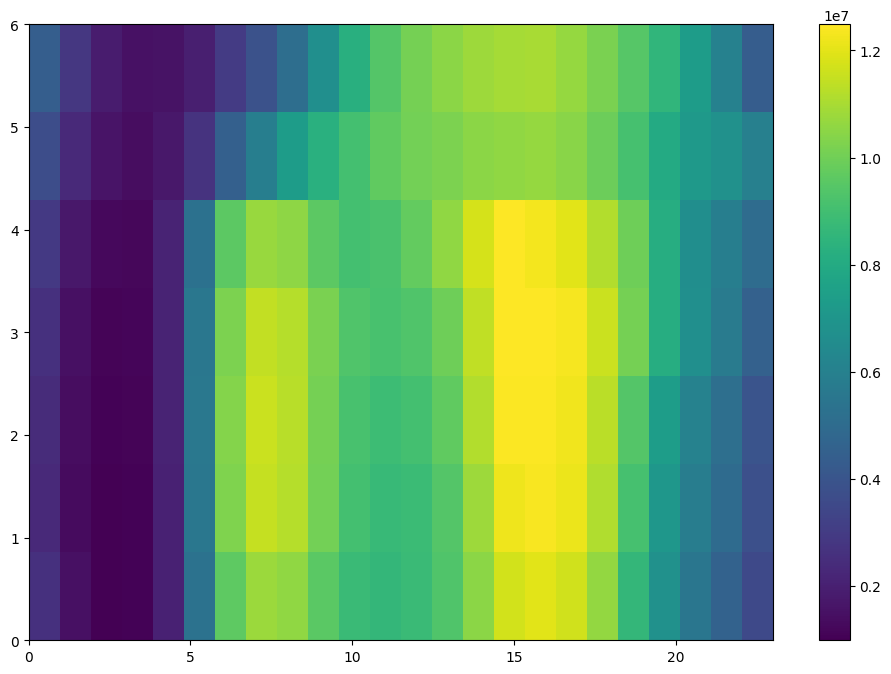

In [53]:
plt.figure(figsize=(12,8))
plt.hist2d(sample["Hour"],sample['Day of Week'],bins=[24,7],weights=sample["# Vehicles - E-ZPass"]);

plt.colorbar() # adiciona uma legenda das cores